## Python第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Python1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

## 作业

写作业赶上写论文了，服气

#### 简答题

- 1.你常用Jupyter notebook中的magic函数都有哪些？

###### magic函数主要包含两大类：
+ 一类是**行魔法（Line magic）前缀为%**，表示magic只在本行有效。
+ 一类是**单元魔法(Cell magic)前缀为%%**，表示magic只在本行有效。  

###### 我常用的magic函数有：
1. %lsmagic:打印当前可以用的魔法命令
2. %matplotlib inline：使用matplotlib画图时，图片嵌入在jupyter notebook里面，不以单独窗口显示
3. %timeit:代码执行计时
4. %%writefile:后面紧接着一个file_name.py,表示在jupyter notebook里面创建一个py文件，后面cell里面的内容为py文件内容
5. %run:后面紧接着一个相对地址的file_name.py，表示运行一个py文件
6. %load #加载一个文件里面的内容
7. %whos:查看当前变量,类型，信息
8. %reset:清除变量
9. %del:清除某一个变量及其引用关系
10. %+操作系统命令：在notebook中执行操作系统相关命令。

- 2.简述Python文件运行的流程

概括的说就是：其实python程序的执行过程与java非常类似，即**Python将.py编译为字节码，然后通过虚拟机执行**,只是说，Python虚拟机比Java虚拟机更抽象，离底层更远。

### 具体步骤如下：

#### 步骤一：将源码文件编译成字节码文件

程序执行时，Python解释器首先会先将源代码编译成字节码的形式，编译过程不仅生成字节码，还要包含常量、变量、占用栈的空间、进程上下文等元数据。
编译是一个简单的翻译步骤，而且字节码是源代码底层的、与平台无关的表现形式。概括来讲，就是Python通过把每一条源代码分解为单一步骤来将这些源语句翻译成一组字节码指令，这些字节码可以提高执行速度，这个过程对于用户来说是完全隐藏起来的。

具体的形式的可以从两个维度来观察：
+ 内存上的形式：内存中的编译过程是**绝对必要**的，Python解释器将.py程序编译为PyCodeObject，具体过程与编译原理类似，PyCodeObject则保存了常量、变量、占用栈的空间、进程上下文等元数据信息。
  - 备注：如果在上次保存字节码后没有修改过源代码，Python会直接加载.pyc文件读取PyCodeObject对象，并跳过编译这一步。当Python必须重新编译时，它会自动检查源文件和字节码文件的时间戳。
+ 硬盘上形式：就是将PyCodeObject对象写入扩展名为.pyc的二进制文件中，该过程是**相对必要**的，是否有必要分以下三种情况：
 - 直接执行.py程序，没有必要生成.pyc文件；
 - 如果当前.py程序不止运行一次，则有必要生成.pyc文件；
 - 如果当前的.py程序被其他程序import了，则有必要生成.pyc文件。
 从内存到硬盘的关系来看：我个人将PyCodeObject对象和pyc文件的关系定位为：pyc文件其实是PyCodeObject的一种持久化保存方式。
 与Java不同的是，Java有专门的编译器对源码进行编译，而Python则是直接在解释器上进行编译的。

#### 步骤二：Python虚拟机执行字节码指令
一旦程序编译成字节码(或字节码从已经存在的.pyc文件中载入)之后，PVM从PyCodeObject读取字节码一条一条执行，本质就是模仿可执行文件的入栈出栈调用顺序执行。
与Java相同的是，Java与Python则是直接在解释器上进行执行的。、

#### 个人总结
从上述的步骤来看，Python的执行过程都是在解释器上完成的。或许这也能从另外一个角度来说明Python是一门解释性语言。


#### 执行流程也可以参考下图：
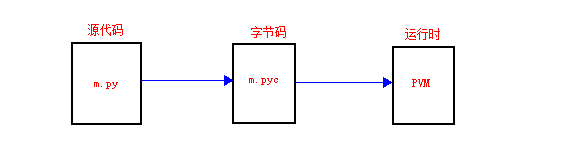

- 3.何为字符串驻留intern？

值同样的字符串对象仅仅会保存一份，是共用的，这也决定了字符串必须是不可变对象。

就跟数值类型一样，同样的数值仅仅要保存一份即可了，不是必需用不同对象来区分。

与Java采用了字符串常量池的原理类似，python中的字符串采用了intern机制，这也做的好处就是需要引用值同样的字符串的时候（比方标识符）则直接从池里拿来用，其优缺点如下
+ **优点**：避免频繁的创建和销毁，提升效率，节约内存；
+ **缺点**：拼接字符串、对字符串改动之类的影响性能，如果字符串过长的时候，时空复杂度也很高。

- 4.简单说说Python中的垃圾回收

Python的GC模块主要运用了引用计数来跟踪和回收垃圾。在引用计数的基础上，还可以通过“标记－清除”解决容器对象可能产生的循环引用的问题。通过分代回收以空间换取时间进一步提高垃圾回收的效率。
+ **第一种：引用计数**：
 - **原理**：当一个对象的引用被创建或者复制时，对象的引用计数加1；当一个对象的引用被销毁时，对象的引用计数减1，当对象的引用计数减少为0时，就意味着对象已经再没有被使用了，可以将其内存释放掉，该原理与Java虚拟机的计数一样。
 - **优点**：引用计数有一个很大的优点，即实时性，任何内存，一旦没有指向它的引用，就会被立即回收，而其他的垃圾收集技术必须在某种特殊条件下才能进行无效内存的回收。
 - **缺点**：引用计数机制所带来的维护引用计数的额外操作与Python运行中所进行的内存分配和释放，引用赋值的次数是成正比的，这显然比其它那些垃圾收集技术所带来的额外操作只是与待回收的内存数量有关的效率要高。同时，引用技术还存在另外一个很大的问题－循环引用，因为对象之间相互引用，每个对象的引用都不会为0，所以这些对象所占用的内存始终都不会被释放掉。

+ **第二种：标记-清除**
  - **原理**：将集合中对象的引用计数复制一份副本，这个计数副本的作用是寻找root object集合（该集合中的对象是不能被回收的）。当成功寻找到root object集合之后，首先将现在的内存链表一分为二，一条链表中维护root object集合，成为root链表，而另外一条链表中维护剩下的对象，成为unreachable链表。一旦在标记的过程中，发现现在的unreachable可能存在被root链表中直接或间接引用的对象，就将其从unreachable链表中移到root链表中；当完成标记后，unreachable链表中剩下的所有对象就是名副其实的垃圾对象了，接下来的垃圾回收只需限制在unreachable链表中即可。
 - **缺点**：该机制所带来的额外操作和需要回收的内存块成正比。
 
+ **第三种：分代：**
 + **原理**：将系统中的所有内存块根据其存活时间划分为不同的集合，每一个集合就成为一个“代”，垃圾收集的频率随着“代”的存活时间的增大而减小。也就是说，活得越长的对象，就越不可能是垃圾，就应该减少对它的垃圾收集频率。
 + **那么如何来衡量这个存活时间**：通常是利用几次垃圾收集动作来衡量，如果一个对象经过的垃圾收集次数越多，该对象存活时间就越长。

- 5.迭代器与生成器有什么相似与不同的地方？

**相同点：**
 + 迭代器和生成器都是Python中特有的概念；
 + 操作的对象都可以包含string、array、list、dict、tuple等这类容器对象；
 + 生成器是一种特殊的迭代器。

**异同点：**
1. 概念区别：
  + 迭代器(iterator)是一种对象，它能够用来遍历标准模板库容器中的部分或全部元素，每个迭代器对象代表容器中的确定的地址；
  + 生成器(Generator)是一次生成一个值的特殊类型函数，可以将其视为可恢复函数，调用该函数将返回一个可用于生成连续值的生成器；
2. 语法区别：
  + 迭代器的创建首先跟函数无关，可以用iter()来创建；
  + 生成器是用函数中yield语句来创建的；
3. 应用区别：
  + 迭代器同样可以被for和next调用，但是由于没有其他过程，在被调用时只会返回值，不会有其他动作；
  + 由于生成器是使用函数的方式创建的，所以生成器里面的所有过程都会被执行，但请注意生成器里面的过程只有在被next()调用或者for循环调用时，里面的过程才会被执行。


- 6.简述您对Python语言中的名字空间的认识？

通俗讲：名称空间就是存放名字的地方，也就是名称到对象的映射。

命名空间是一个字典的实现，键为变量名，值是变量对应的值。

各个命名空间是独立没有关系的，一个命名空间中不能有重名，但是不同的命名空间可以重名而没有任何影响。

**1. 名称空间分类**

 + 内置命名空间（Built-in）：任何模块均可以访问，放着内置的函数和异常（比如：input，print，str，list，tuple...）
 + 全局命名空间（Global）：每个模块加载执行时创建的，记录了模块中定义的变量，包括模块中定义的函数、类、其他导入的模块、模块级的变量与常量。
 + 局部命名空间（Local）：每个函数所拥有的命名空间，记录了函数中定义的所有变量，包括函数的入参、内部定义的局部变量。

**2.名称空间的加载顺序**

内置命名空间(程序运行前加载)-->全局命名空间(程序运行中：从上到下加载)-->局部命名空间(程序运行中：调用时才加载)

**3.名称空间的取值顺序**

 + 在局部调用：局部命名空间-->全局命名空间-->内置命名空间 

 + 在全局调用：全局命名空间-->内置命名空间

#### 编程题

- 7.请对输入三个整数a,b,c,判断能否以它们为三个边长构成三角形。若能，输出YES和面积，否则输出NO

In [1]:
a = input("请输入边长a:")
b = input("请输入边长b:")
c = input("请输入边长c:")
try:
    a = int(a)
    b = int(b)
    c = int(c)
    if ((a + b) > c) and ((a + c) > b) and ((b + c) > a):
        print("YES")
        p = (a + b + c)/2.0
        print("该三角形的面积为：{}".format((p*(p - a)*(p - b)*(p - c))**0.5))
    else:
        print("NO")

except ValueError:
    print("边长请输入整数")


请输入边长a:3
请输入边长b:4
请输入边长c:5
YES
该三角形的面积为：6.0


- 8.可逆素数是将某素数的各位数字顺序颠倒后仍为素数的数，请编程并输出200以内的可逆素数

In [ ]:
def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for a in range(3, int(n ** 0.5) + 2):
        if n % a == 0:
            return False
    return True


def reverse_num(n):
    num_length = len(str(n))
    if num_length == 1:
        return n
    if num_length == 2:
        x = n / 10
        y = n % 10
        return y * 10 + x
    else:
        x = n / 100
        y = n / 10 % 10
        z = n % 10
        return x + y * 10 + z * 100


for i in range(200):
    if is_prime(i) and is_prime(reverse_num(i)):
        print(i)
